<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Intro to Neural Networks


_Author:_ Tim Book

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Making some fake data for illustration purposes.
# On your own time, try making this BIGGER!
X, y = make_classification(
    n_samples=100_000,
    n_features=200,
    n_informative=200,
    n_redundant=0,
    n_classes=10,
    random_state=42
)

In [3]:
y

array([0, 8, 6, ..., 3, 9, 0])

In [4]:
# Since we're doing multiclass classification, we actually need to one-hot
# encode y to be an n-by-10 matrix. Keras doesn't know we're doing classification!
oh = OneHotEncoder(
    sparse=False,
    dtype=int,
    categories="auto"
)

y = oh.fit_transform(y.reshape(-1, 1))

In [5]:
X.shape

(100000, 200)

In [6]:
y.shape

(100000, 10)

In [7]:
y[:10, :]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [8]:
# Instantiate model
model = Sequential()

In [9]:
# One by one, add Dense layers to our model.
# The hidden layers will use the ReLU activation
# Output layer will have softmax
model.add(Dense(128, activation="relu", input_shape=(200,)))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [10]:
# We need to compile our model in Keras.
# Need to tell it three things:
# Optimizer (for us, usually Adam)
# Loss (which?)
# Metrics (Definitely need accuracy, but could do more)

#opt = SGD(learning_rate=0.01)
#opt = Adam(learning_rate=0.001)

model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["acc"]
)

In [11]:
# Fit!
# Need to specify batch_size and epochs
# Can validate with validation_split
hist = model.fit(
    X, y,
    batch_size=32,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
2500/2500 [==============================] - 4s 1ms/step - loss: 1.7819 - acc: 0.4116 - val_loss: 1.0878 - val_acc: 0.6355
Epoch 2/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.7297 - acc: 0.7601 - val_loss: 0.6321 - val_acc: 0.7965
Epoch 3/10
2500/2500 [==============================] - 4s 1ms/step - loss: 0.4592 - acc: 0.8550 - val_loss: 0.5418 - val_acc: 0.8305
Epoch 4/10
2500/2500 [==============================] - 4s 2ms/step - loss: 0.3592 - acc: 0.8888 - val_loss: 0.5493 - val_acc: 0.8354
Epoch 5/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.3045 - acc: 0.9067 - val_loss: 0.5066 - val_acc: 0.8547
Epoch 6/10
2500/2500 [==============================] - 4s 1ms/step - loss: 0.2689 - acc: 0.9179 - val_loss: 0.5007 - val_acc: 0.8590
Epoch 7/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.2412 - acc: 0.9271 - val_loss: 0.5143 - val_acc: 0.8595
Epoch 8/10
2500/2500 [==============================] - 3s 1ms

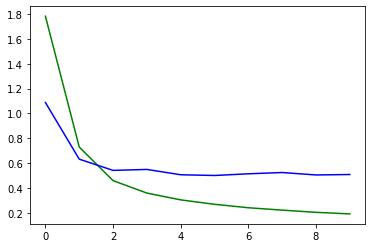

In [12]:
plt.plot(hist.epoch, hist.history['loss'], c='g');      # green - training loss
plt.plot(hist.epoch, hist.history['val_loss'], c='b');  # blue - test loss